In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 1. Import the train datasets

In [2]:
X_train = pd.read_csv("data-train.csv",index_col=0)
X_train.drop(['sales'],axis=1)
Y_train = X_train.sales

In [3]:
#X_train = pd.read_csv("B_encoded_train_data.csv",index_col=0)
#Y_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [4]:
Model_1 = GradientBoostingRegressor()

# 2. Setup Pipeline

In [5]:

RG = Model_1

In [6]:

pipe = Pipeline(steps=[("RG",RG)])

In [7]:
param_grid = {
    "RG__learning_rate":[0.005,0.1,0.5,1,10],
    "RG__n_estimators":[10,100],
    "RG__min_samples_split":[0.01*i for i in range(1,3)],
    "RG__ccp_alpha":[0.005,0.1,0.5,10]
    
}

# 3. Setup GridSearch

In [8]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [9]:
search.fit(X_train,Y_train.values.ravel())

C:\Users\Wayne Linn\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: RuntimeWarning: overflow encountered in square
  array_stds = np.sqrt(np.average((array -


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('RG', GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'RG__ccp_alpha': [0.005, 0.1, 0.5, 10],
                         'RG__learning_rate': [0.005, 0.1, 0.5, 1, 10],
                         'RG__min_samples_split': [0.01, 0.02],
                         'RG__n_estimators': [10, 100]},
             scoring='neg_mean_squared_error')

In [10]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-35.364):
{'RG__ccp_alpha': 0.005, 'RG__learning_rate': 0.5, 'RG__min_samples_split': 0.01, 'RG__n_estimators': 100}


In [11]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RG__ccp_alpha,param_RG__learning_rate,param_RG__min_samples_split,param_RG__n_estimators,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
9,4.911916,2.700389,0.028489,7.305746e-02,0.005,0.5,0.01,100,"{'RG__ccp_alpha': 0.005, 'RG__learning_rate': ...",-1.118042e+00,...,-2.677658e+01,-2.991230e+02,-1.959836e+00,-4.861289e+00,-1.068701e+00,-7.742943e+00,-1.036878e+00,-3.536410e+01,88.230255,1
7,4.152880,2.815515,0.002152,1.749855e-03,0.005,0.1,0.02,100,"{'RG__ccp_alpha': 0.005, 'RG__learning_rate': ...",-1.329910e-01,...,-2.842945e+01,-3.460774e+02,-1.509217e-01,-6.756949e+00,-1.606124e-01,-3.664048e+00,-8.419343e-01,-3.867790e+01,102.799798,2
15,1.610859,2.006306,0.028735,7.922216e-02,0.005,1,0.02,100,"{'RG__ccp_alpha': 0.005, 'RG__learning_rate': ...",-1.341322e+00,...,-6.060986e+01,-2.988227e+02,-1.165537e+00,-1.340031e+01,-7.639306e-01,-6.859630e+00,-2.222980e+00,-3.914430e+01,88.265337,3
8,0.352757,0.315612,0.002992,2.185142e-07,0.005,0.5,0.01,10,"{'RG__ccp_alpha': 0.005, 'RG__learning_rate': ...",-3.939001e+00,...,-2.698142e+01,-3.114563e+02,-4.101640e+00,-9.113117e+00,-3.541889e+00,-1.634583e+01,-3.173221e+00,-3.923715e+01,91.020344,4
27,3.555298,2.858429,0.030159,7.729955e-02,0.1,0.1,0.02,100,"{'RG__ccp_alpha': 0.1, 'RG__learning_rate': 0....",-2.617531e-01,...,-3.263819e+01,-3.553158e+02,-3.480039e-01,-8.146124e+00,-3.422013e-01,-3.338380e+00,-8.606966e-01,-4.023741e+01,105.452964,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,3.603368,2.793196,0.002161,4.639471e-03,0.005,10,0.02,100,"{'RG__ccp_alpha': 0.005, 'RG__learning_rate': ...",-5.175192e+193,...,-2.233008e+194,-1.341250e+194,-3.729433e+193,-1.824806e+194,-7.389604e+193,-1.322238e+194,-5.964785e+193,-1.040493e+194,inf,74
59,2.481631,2.603918,0.001496,1.905504e-03,0.5,10,0.02,100,"{'RG__ccp_alpha': 0.5, 'RG__learning_rate': 10...",-5.175192e+193,...,-2.233008e+194,-1.341250e+194,-3.729433e+193,-1.824806e+194,-7.389604e+193,-1.322238e+194,-5.964785e+193,-1.040493e+194,inf,74
17,2.205113,2.565251,0.006036,5.087685e-03,0.005,10,0.01,100,"{'RG__ccp_alpha': 0.005, 'RG__learning_rate': ...",-5.175192e+193,...,-2.233008e+194,-1.341250e+194,-3.729433e+193,-1.824806e+194,-7.389604e+193,-1.322238e+194,-5.964785e+193,-1.040493e+194,inf,78
39,3.131298,2.976172,0.005383,5.369987e-03,0.1,10,0.02,100,"{'RG__ccp_alpha': 0.1, 'RG__learning_rate': 10...",-5.175192e+193,...,-2.233008e+194,-1.341250e+194,-3.729433e+193,-1.824806e+194,-7.389604e+193,-1.322238e+194,-5.964785e+193,-1.040493e+194,inf,78


# 4. Best Hyperparameter

In [12]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'RG__ccp_alpha': 0.005, 'RG__learning_rate': 0.5, 'RG__min_samples_split': 0.01, 'RG__n_estimators': 100}


# 5. Evaluate Model $log(Sales)$

In [13]:
best_lr = parms.iloc[0][0]['RG__learning_rate']
best_n_est = parms.iloc[0][0]['RG__n_estimators']
best_min_ss=parms.iloc[0][0]['RG__min_samples_split']
best_ccp_alpha=parms.iloc[0][0]['RG__ccp_alpha']
#best_pca=170
#best_lr=0.1
#best_n_est=100

In [14]:
Model_2 = GradientBoostingRegressor(learning_rate=best_lr,n_estimators=best_n_est,min_samples_split=best_min_ss,ccp_alpha=best_ccp_alpha)

In [15]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [16]:

RG1 = Model_2
RG1.fit(X_train1,Y_train1.values.ravel())

GradientBoostingRegressor(ccp_alpha=0.005, learning_rate=0.5,
                          min_samples_split=0.01)

In [17]:
MSE(RG1.predict(X_test1),Y_test1)

107.30984402292606

In [18]:
result = pd.DataFrame(Y_test1)

In [19]:
result["Predicted_sales"] = RG1.predict(X_test1)

In [20]:
MSE(result["sales"],result["Predicted_sales"])

107.30984402292606

# 6. Inventory Decision

In [21]:
residual = result['sales']-result['Predicted_sales']

In [22]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [23]:
import scipy.stats as sct

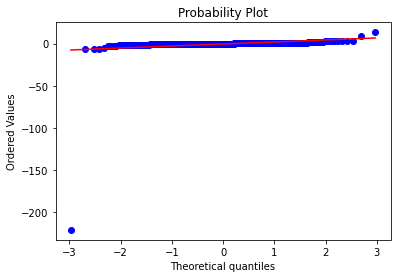

In [24]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [25]:
s = residual.std()
opt_dec_N=round(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

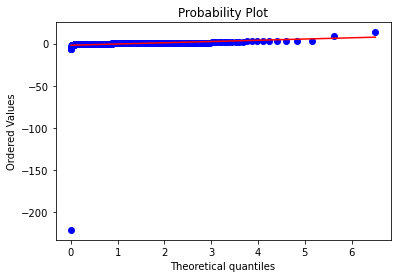

In [26]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [27]:
opt_dec_E=round((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

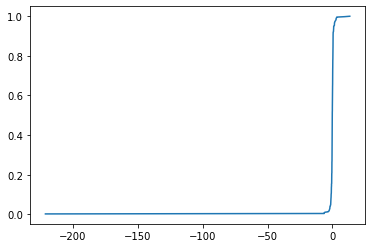

In [28]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

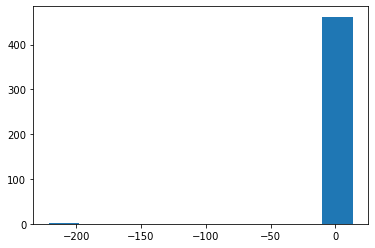

In [29]:
plt.hist(Sample)
plt.show()

In [30]:
def inv(sample,jump,area):
    size = len(sample)
    i=0
    temp=jump[i]
    while temp<area:
        i+=1
        temp=jump[i]
        
    return sample[i]

In [31]:
offset = inv(Sample,jumps,2/3)
offset

0.22441656244879127

In [32]:
opt_dec_B = round(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [33]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096

In [34]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [35]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

72720.0

In [36]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

77152.0

In [37]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

79932.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [38]:
Model_4= GradientBoostingRegressor(learning_rate=best_lr,n_estimators=best_n_est,min_samples_split=best_min_ss,ccp_alpha=best_ccp_alpha)

In [39]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    #PCA to transform train data
    
    #Model
    RG_K = Model_4
    RG_K.fit(X_train_K,Y_train_K.ravel())
    
    #pca to transform test data
    
    #MSE
    mse_lst.append(MSE(RG_K.predict(X_test_K),Y_test_K))
    
    #Transform log(sale) back to sale
    result_K = pd.DataFrame(Y_test_K)
    result_K["Predicted_sales"] = RG_K.predict(X_test_K)
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

In [40]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,0.885850,0.900742,0.892604,0.887039,0.858662,0.880455,0.901242,0.898786,0.894059,0.892048,0.889149
Exponential,0.937657,0.942637,0.940211,0.940858,0.904351,0.943454,0.941840,0.941977,0.937992,0.940549,0.937153
Empirical,0.977383,0.975164,0.971661,0.964292,0.930943,0.976234,0.978272,0.979618,0.976020,0.977718,0.970730


In [41]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,36660.0,40764.0,41324.0,41336.0,42624.0,34380.0,44132.0,41452.0,39968.0,37152.0,39979.2,2846.690598
Exponential,38804.0,42660.0,43528.0,43844.0,44892.0,36840.0,46120.0,43444.0,41932.0,39172.0,42123.6,2797.916625
Empirical,40448.0,44132.0,44984.0,44936.0,46212.0,38120.0,47904.0,45180.0,43632.0,40720.0,43626.8,2829.849494
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [42]:
profit_table.to_csv(".\\Model_Selection_Result\\4.3B_Gradient_boosting(No_PCA).csv")

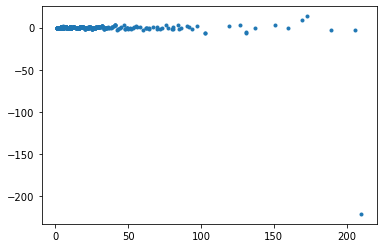

In [43]:
plt.plot(result['sales'],residual,".")